<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_maio_2020/blob/master/ANN_segmentacao_sugar_OUR_CODE_v_06_maio_21_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
import random

import re
from sklearn.model_selection import train_test_split

In [2]:
!pip install mahotas

In [0]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [6]:
''''''
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()


fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [0]:
Size=28 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

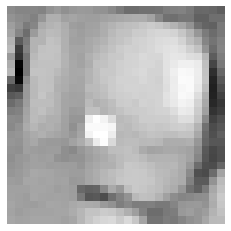

In [8]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[10], cmap = "gray")

In [9]:
y_valor=[]

Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

for x in img_name:
  if re.search(Graos, x):
    y_valor.append(1)
  elif re.search(Indef, x):
    y_valor.append(2)
  elif re.search(Buraco, x):
    y_valor.append(3)
  else:
    y_valor.append(4)
    
print(y_valor)
print(len(y_valor))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 

In [0]:
W_train, W_test, yw_train, yw_test = train_test_split(np.array(ww), np.array(y_valor), 
                                                    test_size=0.30, 
                                                    random_state=42)

In [0]:
train_images=W_train
train_labels=yw_train
test_images=W_test
test_labels=yw_test

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 75.5736 - accuracy: 0.4100 
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 35.6112 - accuracy: 0.5624
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 19.0777 - accuracy: 0.6143
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 24.6389 - accuracy: 0.5754
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 16.1916 - accuracy: 0.6596
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 10.1110 - accuracy: 0.7018
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 19.8906 - accuracy: 0.6272
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 20.0862 - accuracy: 0.6029
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 15.7214 - accuracy: 0.6888
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 18.3927 - accuracy: 0.6856


In [0]:
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
# img = img_as_float(astronaut()[::2, ::2])

Transfere='Fotos_Grandes_3cdAmostra.zip'
#Nome='Q6-1-4.jpg'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()
#img=cv2.imread(Nome)

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
img=ww[0]

In [18]:
print(img.shape)

(1200, 1200)


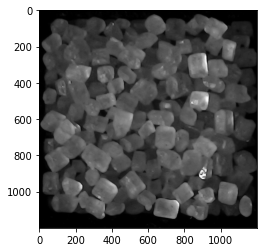

In [19]:
plt.imshow(img, cmap = "gray")

In [0]:
a=0
b=1200
c=100
d=200
Num=25
ww=[]
label=[]

for i in range(Num):
  x=random.randint(a, b)
  y=random.randint(a, b)

  Width=random.randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


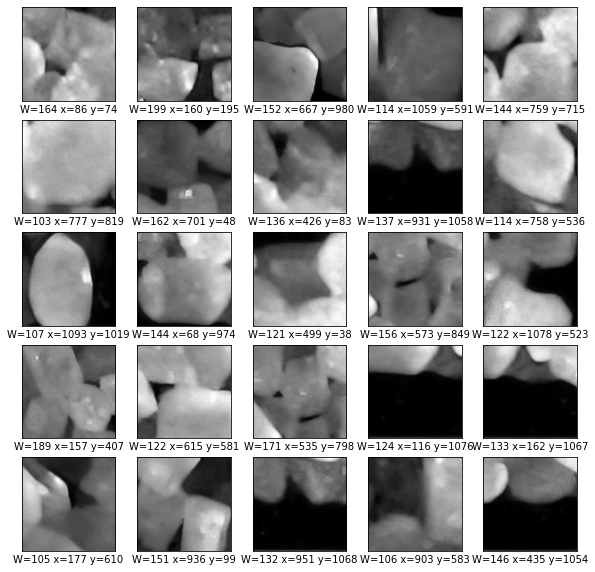

In [21]:
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap = "gray")
    plt.xlabel(label[i])
plt.show()


In [22]:
print(label)

['W=164 x=86 y=74', 'W=199 x=160 y=195', 'W=152 x=667 y=980', 'W=114 x=1059 y=591', 'W=144 x=759 y=715', 'W=103 x=777 y=819', 'W=162 x=701 y=48', 'W=136 x=426 y=83', 'W=137 x=931 y=1058', 'W=114 x=758 y=536', 'W=107 x=1093 y=1019', 'W=144 x=68 y=974', 'W=121 x=499 y=38', 'W=156 x=573 y=849', 'W=122 x=1078 y=523', 'W=189 x=157 y=407', 'W=122 x=615 y=581', 'W=171 x=535 y=798', 'W=124 x=116 y=1076', 'W=133 x=162 y=1067', 'W=105 x=177 y=610', 'W=151 x=936 y=99', 'W=132 x=951 y=1068', 'W=106 x=903 y=583', 'W=146 x=435 y=1054']


In [0]:
#img = ww[0].reshape((28,28))

In [24]:
print(np.array(ww[0]))

[[58 59 59 ... 31 30 31]
 [58 59 59 ... 30 32 30]
 [58 59 60 ... 29 30 29]
 ...
 [53 54 54 ... 58 56 56]
 [55 57 56 ... 59 57 56]
 [54 57 56 ... 59 58 58]]


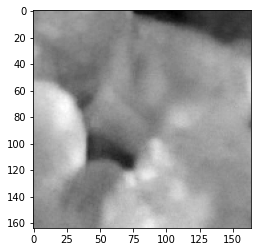

In [33]:
plt.imshow(ww[0], cmap = "gray")

In [25]:
'''
xw=[]
Size=28
for i in range(Num):
  xw.append(cv2.resize(np.array(ww[0]),(Size,Size)))
'''

'\nxw=[]\nSize=28\nfor i in range(Num):\n  xw.append(cv2.resize(np.array(ww[0]),(Size,Size)))\n'

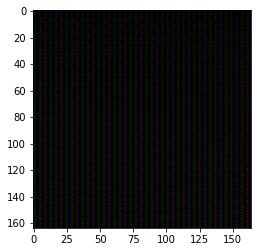

In [31]:
from PIL import Image
#data=np.array(ww[0])
data=ww[0]
img = Image.fromarray(data, 'RGB')
plt.imshow(img)
#newimg = cv2.resize(np.array(ww[0]),(28,28))

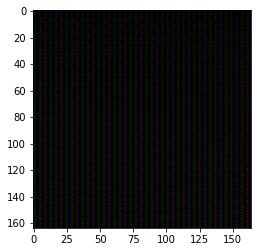

In [34]:
plt.imshow(img, cmap = "gray")

In [30]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

TypeError: ignored

In [27]:
test_input=np.array(xw[0])
image=np.array(ww[0])
#image=ww[0]
#nn = tf.image.resize(image, [28,28], method='nearest')
image=tf.image.resize(image,[28,28], preserve_aspect_ratio=True)
predictions = model(image, training=False)


NameError: ignored

In [0]:
print(predictions)

In [0]:
'''
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap=plt.cm.binary)
    plt.xlabel(img_name[i])
plt.show()
'''